## 0. Import the data and declare your package dependencies.

In [296]:
#import libraries
import numpy as np
import pandas as pd
import plotnine as p9

In [297]:
#import Avocado Dataset
avocados = pd.read_csv("avocado-updated-2020.csv")
avocados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


## 1. Briefly describe the data set. What information does it contain?

This dataset contains information about avocado sales. There is a date column that shows the data was collected between January 1st of 2015 and November 29th of 2020. There is an average_price column that shows the average price of avocados that day and a total_volume column that shows the amount of avocados sold that day. There are the columns 4046, 4225, and 4770 which show the small/medium avocados sold, the large avocados sold, and the extra large avocados sold respectively. There are the columns total_bags which shows the amount of bags of avocados sold, and the columns small_bags, medium_bags, large bags, and xlarge_bags which show the amount of each size bag sold. There is a categorical variable year column which signifies whether the avocados were organic or conventional. There is a year column which shows the years the columns were purchased, and a geography variable which shows where the avocados were purchased.

## 2. Clean the data in any way you see fit.

In [298]:
#check data type of each column
avocados.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [299]:
#convert date from string to datetime variable type
avocados['date'] = pd.to_datetime(avocados['date'], infer_datetime_format=True)

#rename variables to be more clear
avocados = avocados.rename(columns={'4046': 'small_med_avo', '4225':'large_avo', '4770': 'xlarge_avo'})

#verify that it worked
avocados.dtypes


date             datetime64[ns]
average_price           float64
total_volume            float64
small_med_avo           float64
large_avo               float64
xlarge_avo              float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
dtype: object

In [300]:
#check for missing values
avocados.isnull().sum()

date             0
average_price    0
total_volume     0
small_med_avo    0
large_avo        0
xlarge_avo       0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [301]:
#check for duplicate rows
avocados[avocados.duplicated()]

,date,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography


In [302]:
#check the amount of unique regions listed in the regions column
avocados['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [303]:
avocados['geography'].nunique()

54

In [304]:
#separate unique geography values into cities, states, metro_areas, regions, and countries lists
cities = ['Albany', 'Atlanta', 'Boise', 'Boston', 'Charlotte', 'Chicago','Columbus','Denver', 'Detroit', 'Grand Rapids',
          'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Nashville', 'New York',
          'Orlando', 'Philadelphia', 'Pittsburgh', 'Portland', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco',
          'Seattle', 'South Carolina', 'Spokane','St. Louis', 'Syracuse', 'Tampa']
states = ['California', 'South Carolina']
metro_areas = ['Baltimore/Washington', 'Buffalo/Rochester', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton',
               'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Phoenix/Tucson', 'Raleigh/Greensboro',
               'Richmond/Norfolk', 'West Tex/New Mexico']
regions = ['Great Lakes', 'Midsouth', 'Northeast', 'Northern New England','Plains', 'South Central', 'Southeast', 'West']
countries = ['Total U.S.']

#create an empty new column "geo_label"
avocados['geo_label'] = None

#classify cities
avocados.loc[avocados['geography'].isin(cities), 'geo_label'] = 'City'

#classify metro cities
avocados.loc[avocados['geography'].isin(metro_areas), 'geo_label'] = 'Metro Area'

#classify states
avocados.loc[avocados['geography'].isin(states), 'geo_label'] = 'State'

#classify regions
avocados.loc[avocados['geography'].isin(regions), 'geo_label'] = 'Region'

#classify countries
avocados.loc[avocados['geography'].isin(countries), 'geo_label'] = 'Country'

#create dummy variables for each geography
geo_label_dummies = pd.get_dummies(avocados["geo_label"], prefix='geo_label')

#add dummy variables to the avocados dataframe
avocados = pd.concat([avocados, geo_label_dummies], axis=1)

#rename column headers to remove capitalization and spaces
avocados = avocados.rename(columns={'geo_label_City': 'geo_label_city', 'geo_label_Country': 'geo_label_country', 'geo_label_Metro Area': 'geo_label_metro_area', 'geo_label_Region': 'geo_label_region', 'geo_label_State': 'geo_label_state'})

avocados

,date,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_label,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,City,1,0,0,0,0
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,City,1,0,0,0,0
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,City,1,0,0,0,0
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,City,1,0,0,0,0
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro Area,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,Country,0,1,0,0,0
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Region,0,0,0,1,0
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Region,0,0,0,1,0
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Metro Area,0,0,1,0,0


## 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [305]:
#filter down to geographies with region label in 2017 with organic avocados
question_3_filter = avocados[
    (avocados['geo_label_region'] == 1) &
    (avocados['type'] == 'organic') &
    (avocados['year'] == 2017)
    ]
question_3_filter

,date,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_label,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state
11262,2017-01-01,1.44,104153.91,4104.86,69800.29,0.00,30248.76,23593.03,6655.73,0.00,organic,2017,Great Lakes,Region,0,0,0,1,0
11282,2017-01-01,1.72,72287.79,3353.64,36090.72,1813.60,31029.83,29203.33,1826.50,0.00,organic,2017,Midsouth,Region,0,0,0,1,0
11290,2017-01-01,2.00,115256.09,9132.13,36276.39,923.53,68924.04,65447.53,3476.51,0.00,organic,2017,Northeast,Region,0,0,0,1,0
11292,2017-01-01,1.91,9214.09,6.23,130.87,0.00,9076.99,9076.99,0.00,0.00,organic,2017,Northern New England,Region,0,0,0,1,0
11302,2017-01-01,1.62,47042.21,4547.17,15245.73,1366.36,25882.95,17253.74,8629.21,0.00,organic,2017,Plains,Region,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16906,2017-12-31,1.76,20129.50,0.00,200.68,0.00,19928.82,19925.49,3.33,0.00,organic,2017,Northern New England,Region,0,0,0,1,0
16916,2017-12-31,1.63,62228.22,3018.47,15029.08,38.91,44141.76,32311.88,11829.88,0.00,organic,2017,Plains,Region,0,0,0,1,0
16936,2017-12-31,1.41,115959.77,25221.46,3103.46,0.00,87634.85,82290.07,5344.78,0.00,organic,2017,South Central,Region,0,0,0,1,0
16938,2017-12-31,1.40,92000.75,1052.21,15703.49,169.38,75075.67,69576.29,5499.38,0.00,organic,2017,Southeast,Region,0,0,0,1,0


In [306]:
#group the filtered data by their geography and sort in descending order based on the small_med_avo variable
grouped_data = question_3_filter.groupby('geography').sum(numeric_only=True)
grouped_data.sort_values('small_med_avo', ascending = False)

,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,year,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state
geography,,,,,,,,,,,,,,,
West,89.13,12241845.79,1870206.29,2419325.29,10504.03,7941810.18,3570975.37,4368902.45,1932.36,106901,0,0,0,53,0
South Central,72.86,7104671.46,1717104.19,315400.79,53.10,5072113.38,4699475.63,372637.75,0.00,106901,0,0,0,53,0
Northeast,99.79,11760003.74,925832.36,2776538.58,26356.05,8031276.75,7549951.02,481325.73,0.00,106901,0,0,0,53,0
Southeast,89.58,4097434.80,285124.34,955654.49,10897.81,2845758.16,1936577.04,909181.12,0.00,106901,0,0,0,53,0
Great Lakes,80.45,8928083.94,202487.68,3301766.04,98.79,5412599.80,3051652.96,2360946.84,0.00,106901,0,0,0,53,0
Midsouth,90.93,7047686.31,186395.50,2289574.25,66944.13,4504724.12,3403869.27,1100854.85,0.00,106901,0,0,0,53,0
Plains,91.13,3326803.33,168583.40,1043128.35,41905.22,2073033.95,1223799.04,849210.76,24.15,106901,0,0,0,53,0
Northern New England,91.41,935398.57,1249.48,14099.50,0.00,920049.59,908907.13,11142.46,0.00,106901,0,0,0,53,0


The major geographical region of West sold the most small Hass avocados in 2017 at 1,870,206.

## 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [307]:
#create month and day variables
avocados['month'] = avocados['date'].dt.month
avocados['day'] = avocados['date'].dt.day
avocados

,date,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,geo_label,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,...,2015,Albany,City,1,0,0,0,0,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,...,2015,Albany,City,1,0,0,0,0,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,...,2015,Atlanta,City,1,0,0,0,0,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,...,2015,Atlanta,City,1,0,0,0,0,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,...,2015,Baltimore/Washington,Metro Area,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,...,2020,Total U.S.,Country,0,1,0,0,0,11,29
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,...,2020,West,Region,0,0,0,1,0,11,29
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,...,2020,West,Region,0,0,0,1,0,11,29
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,...,2020,West Tex/New Mexico,Metro Area,0,0,1,0,0,11,29


In [308]:
#groupby month and sort the mean values of total volume in descending order
question_4_group = avocados.groupby('month').mean(numeric_only=True)
question_4_group.sort_values('total_volume', ascending=False)

,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,year,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,day
month,,,,,,,,,,,,,,,,
5,1.362226,1.123632e+06,365450.569945,322915.208484,24807.403755,410266.976481,282949.842977,118736.179386,8580.955833,2017.444444,0.574074,0.018519,0.222222,0.148148,0.037037,16.407407
2,1.248885,1.095374e+06,356108.726586,329465.377199,27114.248681,382679.807581,257941.593086,118359.108364,6379.106130,2017.500000,0.574074,0.018519,0.222222,0.148148,0.037037,14.166667
6,1.403636,1.051247e+06,333553.366679,292529.670089,25541.020170,398948.428058,274579.395827,112721.230545,11647.804281,2017.560415,0.574500,0.018532,0.221646,0.148258,0.037064,15.755745
4,1.374765,1.016582e+06,328330.040096,288992.924466,23387.748900,375867.780659,263520.526179,104816.774014,7530.478686,2017.500000,0.574074,0.018519,0.222222,0.148148,0.037037,15.500000
3,1.316207,9.957150e+05,319500.287778,280341.474979,22722.835312,373146.523045,257800.970532,109003.142239,6342.410274,2017.555556,0.574074,0.018519,0.222222,0.148148,0.037037,15.592593
1,1.287596,9.853122e+05,308693.058179,312853.505905,22480.002184,341278.942956,234641.787819,101886.862623,4750.292514,2017.444444,0.574074,0.018519,0.222222,0.148148,0.037037,15.518519
7,1.457877,9.832681e+05,299886.604012,286913.961481,24286.230278,372170.486228,259734.473515,101153.085415,11282.926612,2017.444444,0.574074,0.018519,0.222222,0.148148,0.037037,16.074074
8,1.470107,9.499249e+05,293459.626250,268170.179452,20111.723497,368181.512073,254275.793565,104320.211189,9585.506962,2017.500000,0.574074,0.018519,0.222222,0.148148,0.037037,16.000000
9,1.485673,9.064773e+05,272419.824619,258556.891759,17596.858949,357901.622625,246234.611004,104358.588974,7308.422646,2017.576923,0.574074,0.018519,0.222222,0.148148,0.037037,15.346154


The average total volume in May is the highest of all of the months at 1,123,632 avocados.

## 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [309]:
#filter down to only metro areas and group by geography
question_5_filter = avocados[avocados['geo_label_metro_area'] == 1]
question_5_group = question_5_filter.groupby('geography').mean(numeric_only=True)
#sort means by total volume in descending order
question_5_plot = question_5_group.sort_values('total_volume', ascending = False).head(5)
#reset the index so that geography can be used for plotting
question_5_plot = question_5_plot.reset_index()
question_5_plot

,geography,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,year,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,month,day
0,Dallas/Ft. Worth,1.076160,712751.896814,329594.576389,127929.248807,10748.742026,244479.332859,179586.615458,63310.788725,1581.920507,2017.460784,0.0,0.0,1.0,0.0,0.0,6.372549,15.529412
1,Phoenix/Tucson,1.209297,625038.257500,293964.716683,120200.269853,5727.927516,205141.899379,94151.706013,110134.888873,855.306127,2017.460784,0.0,0.0,1.0,0.0,0.0,6.372549,15.529412
2,West Tex/New Mexico,1.252972,460774.328900,228346.289360,61954.106995,15811.134319,154662.799869,93258.268259,60192.368276,1212.161691,2017.466338,0.0,0.0,1.0,0.0,0.0,6.364532,15.525452
3,Baltimore/Washington,1.474820,452229.794281,46397.389575,242720.117974,8564.812124,154547.482778,123339.006029,29665.037827,1543.432386,2017.460784,0.0,0.0,1.0,0.0,0.0,6.372549,15.529412
4,Miami/Ft. Lauderdale,1.340425,378668.053399,203481.797484,34664.439493,889.254477,139632.166503,68813.941781,69471.217092,1347.004363,2017.460784,0.0,0.0,1.0,0.0,0.0,6.372549,15.529412


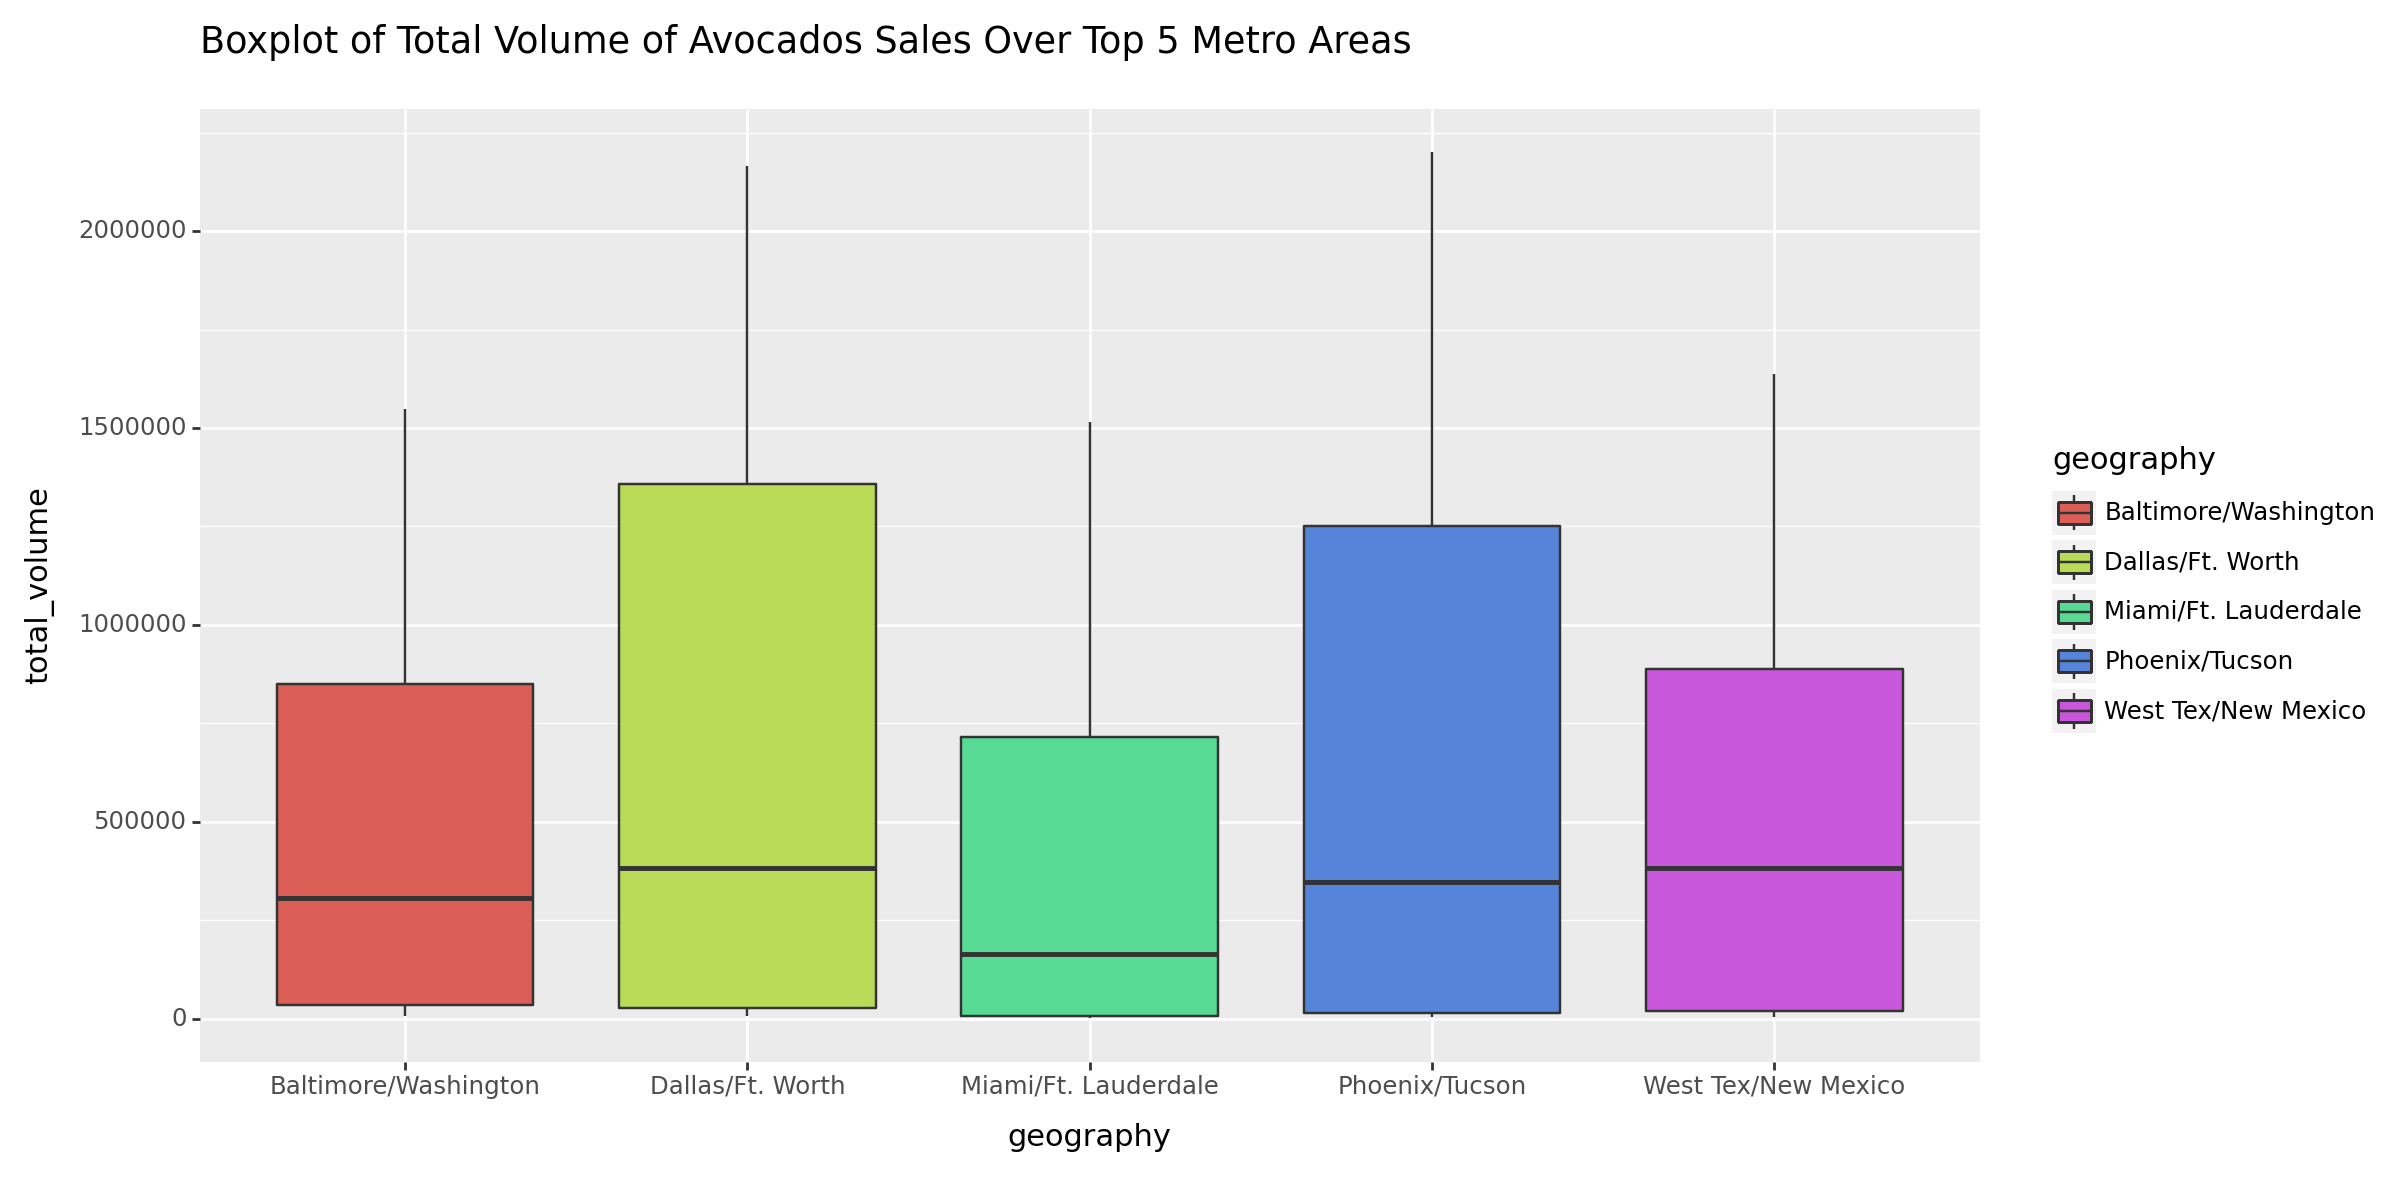

<Figure Size: (1200 x 600)>

In [310]:
#plot side by side boxplots
p9.options.figure_size = (12, 6)
top_5_metros = ['Dallas/Ft. Worth', 'Phoenix/Tucson', 'West Tex/New Mexico', 'Baltimore/Washington', 'Miami/Ft. Lauderdale']
top_5_metros_filter = avocados.loc[avocados['geography'].isin(top_5_metros)]
(p9.ggplot(top_5_metros_filter,
p9.aes(
  x = 'geography',
  y = 'total_volume',
  fill = 'geography'
))
+ p9.geom_boxplot()
+p9.labs(title = "Boxplot of Total Volume of Avocados Sales Over Top 5 Metro Areas")
)

## 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.  "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

In [311]:
#create list of california cities given
cali_cities = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
#filter down to only geography values in the cali_cities list
cali_cities_filter = avocados.loc[avocados['geography'].isin(cali_cities)]
cali_cities_filter

,date,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,geo_label,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,2015,Los Angeles,City,1,0,0,0,0,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,2015,Los Angeles,City,1,0,0,0,0,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,...,2015,Sacramento,City,1,0,0,0,0,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,...,2015,Sacramento,City,1,0,0,0,0,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,...,2015,San Diego,City,1,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,...,2020,Sacramento,City,1,0,0,0,0,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,...,2020,San Diego,City,1,0,0,0,0,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,...,2020,San Diego,City,1,0,0,0,0,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,...,2020,San Francisco,City,1,0,0,0,0,11,29


## 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [312]:
#grouping and calculating the sum of average prices
cali_cities_avg_price_total = cali_cities_filter.groupby(['geography', 'type']).agg({'average_price': 'sum'}).unstack()

#calculating the price difference
cali_cities_avg_price_total['price_diff'] = abs(cali_cities_avg_price_total[('average_price', 'organic')] - cali_cities_avg_price_total[('average_price', 'conventional')])

#sorting by price difference
cali_cities_avg_price_total = cali_cities_avg_price_total.sort_values('price_diff', ascending=False)

#resetting the index and displaying data
cali_cities_avg_price_total = cali_cities_avg_price_total.reset_index()
cali_cities_avg_price_total

geography average_price         price_diff
type                 conventional organic           
0     San Francisco        428.55  648.55     220.00
1         San Diego        340.84  550.30     209.46
2        Sacramento        396.38  573.40     177.02
3       Los Angeles        320.42  481.92     161.50

In [313]:
#grouping and calculating the median of average prices
cali_cities_avg_price_median = cali_cities_filter.groupby(['geography', 'type']).agg({'average_price': 'median'}).unstack()

#calculating the price difference
cali_cities_avg_price_median['price_diff'] = abs(cali_cities_avg_price_median[('average_price', 'organic')] - cali_cities_avg_price_median[('average_price', 'conventional')])

#sorting by price difference
cali_cities_avg_price_median = cali_cities_avg_price_median.sort_values('price_diff', ascending=False)

#resetting the index and displaying the data
cali_cities_avg_price_median = cali_cities_avg_price_median.reset_index()
cali_cities_avg_price_median

geography average_price         price_diff
type                 conventional organic           
0         San Diego          1.09   1.800      0.710
1     San Francisco          1.39   2.060      0.670
2        Sacramento          1.26   1.840      0.580
3       Los Angeles          1.02   1.585      0.565

In [314]:
#grouping and calculating the mean of average prices
cali_cities_avg_price_mean = cali_cities_filter.groupby(['geography', 'type']).agg({'average_price': 'mean'}).unstack()

#calculating the price difference
cali_cities_avg_price_mean['price_diff'] = abs(cali_cities_avg_price_mean[('average_price', 'organic')] - cali_cities_avg_price_mean[('average_price', 'conventional')])

#sorting by price difference
cali_cities_avg_price_mean = cali_cities_avg_price_mean.sort_values('price_diff', ascending=False)

#resetting the index and displaying the data
cali_cities_avg_price_mean = cali_cities_avg_price_mean.reset_index()
cali_cities_avg_price_mean

geography average_price           price_diff
type                 conventional   organic           
0     San Francisco      1.400490  2.119444   0.718954
1         San Diego      1.113856  1.798366   0.684510
2        Sacramento      1.295359  1.873856   0.578497
3       Los Angeles      1.047124  1.574902   0.527778

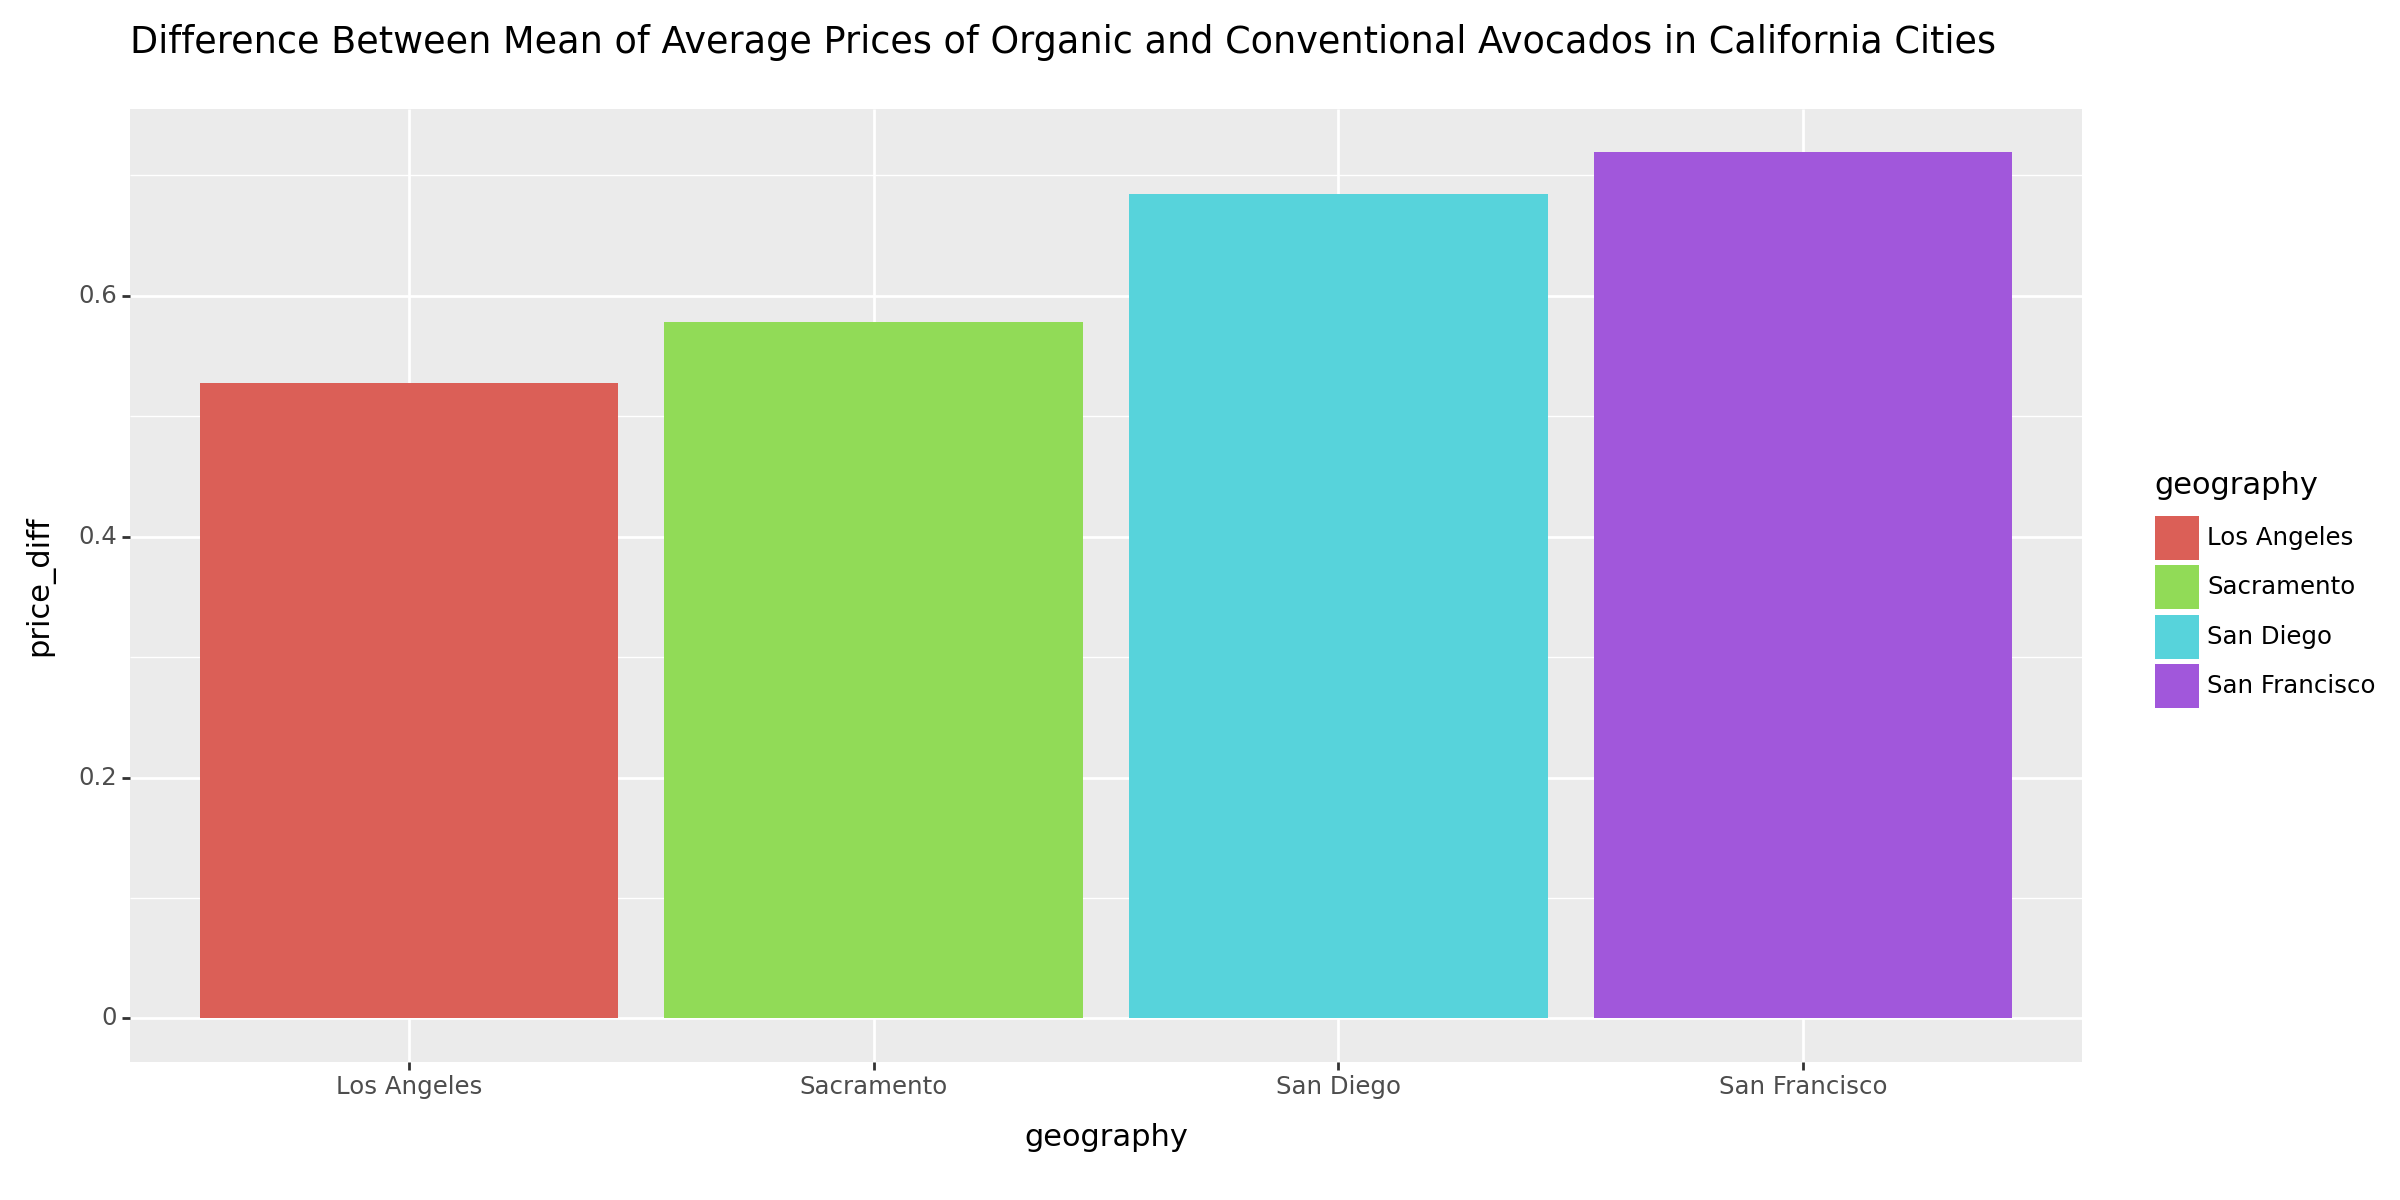

<Figure Size: (1200 x 600)>

In [315]:
#plotting bar chart of the differences in mean
p9.options.figure_size = (12, 6)
(p9.ggplot(cali_cities_avg_price_mean,
p9.aes(
  x = 'geography',
  y = 'price_diff',
  fill = 'geography'
))
+ p9.geom_bar(stat='identity')
+ p9.labs(title = "Difference Between Mean of Average Prices of Organic and Conventional Avocados in California Cities")
)

The city of San Francisco has the largest price difference between conventional and organic avocados, supported by both the difference in the total of their average prices and mean of their average prices as shown in the bar chart above. However, when analyzing the median of the average prices, San Diego narrowly beats San Francisco as the largest difference between organic and conventional avocados. Despite this, more evidence supports that San Francisco has the largest difference in price between conventional and organic avocados.

## 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [316]:
#group by geography and type and specifying size related columns to perform operations on
grouped_data = cali_cities_filter.groupby(['geography', 'type'])[['small_med_avo', 'large_avo', 'xlarge_avo']].sum().reset_index()

size_columns = ['small_med_avo', 'large_avo', 'xlarge_avo']

#creating a total column that is the sum of the size columns
grouped_data['total'] = grouped_data[size_columns].sum(axis=1)

#dividing each size column by the total column to get proportion of each size
grouped_data[size_columns] = grouped_data[size_columns].div(grouped_data['total'], axis=0)
grouped_data

,geography,type,small_med_avo,large_avo,xlarge_avo,total
0,Los Angeles,conventional,0.684389,0.258971,0.056640,5.244437e+08
1,Los Angeles,organic,0.409677,0.590152,0.000171,1.078721e+07
2,Sacramento,conventional,0.361688,0.622099,0.016213,1.195302e+08
3,Sacramento,organic,0.396045,0.603846,0.000109,2.170262e+06
4,San Diego,conventional,0.508891,0.435298,0.055811,9.848990e+07
5,San Diego,organic,0.261274,0.738592,0.000134,3.013542e+06
6,San Francisco,conventional,0.317342,0.660705,0.021953,2.081255e+08
7,San Francisco,organic,0.422433,0.577457,0.000110,6.014521e+06


In [317]:
#melting data to allow for plotting
melted_data = grouped_data.melt(
    id_vars = ['geography', 'type'],
    value_vars = size_columns,
    var_name = 'size',
    value_name = 'proportion'
)
#change the order of the 'size' variable to align with the example plot
melted_data['size'] = pd.Categorical(melted_data['size'], categories=['xlarge_avo', 'large_avo','small_med_avo'], ordered=True)

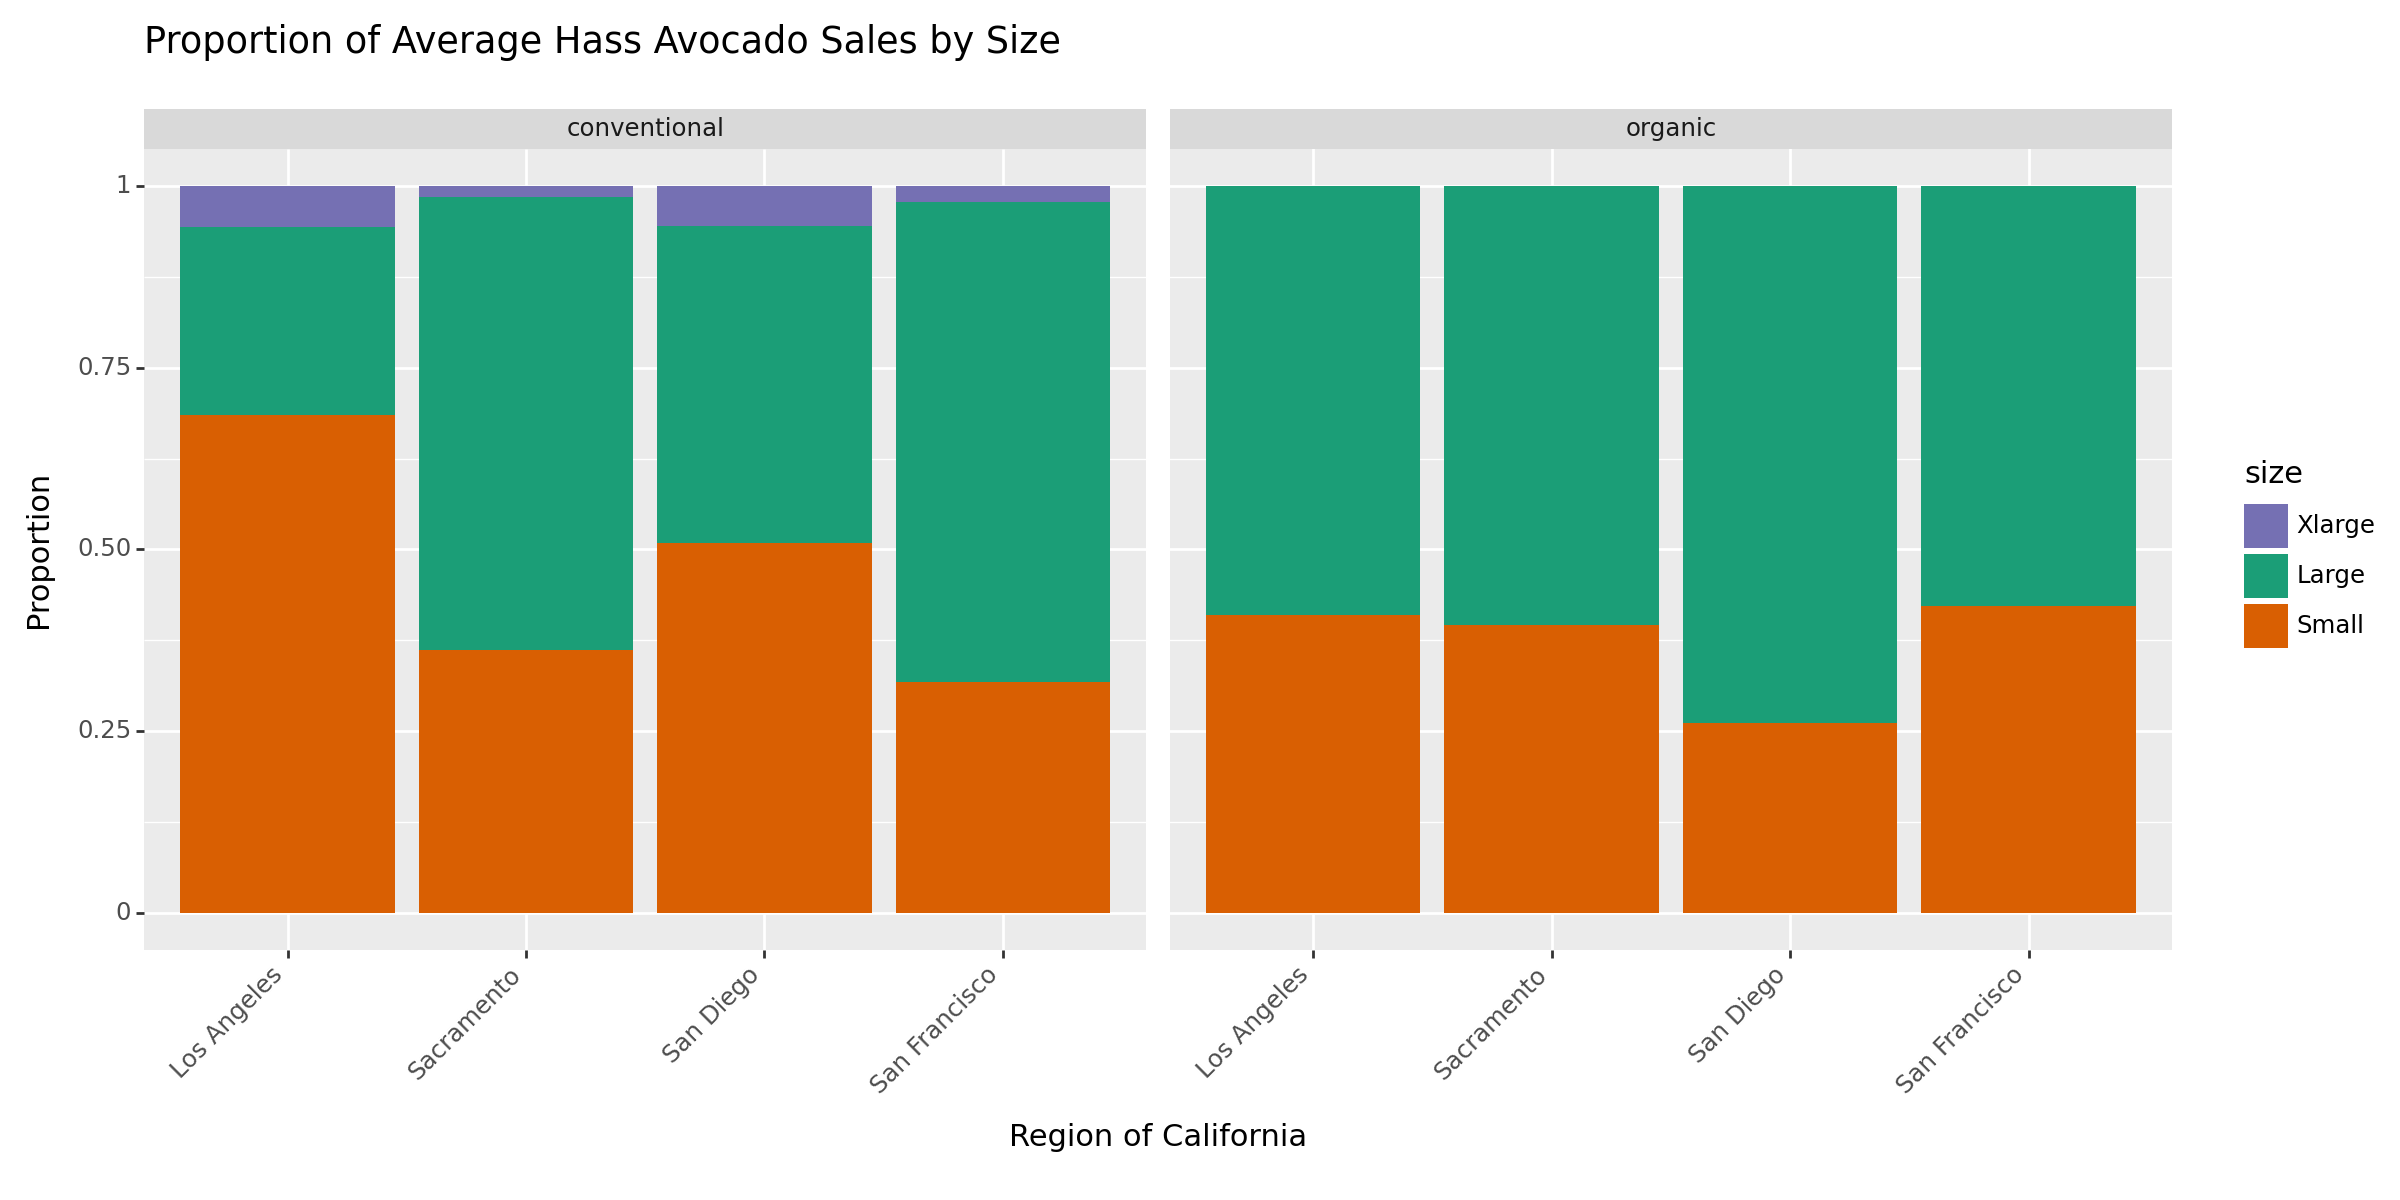

<Figure Size: (1200 x 600)>

In [318]:
#creating stacked bar chart in style of example
(p9.ggplot(melted_data,
p9.aes(
    x='geography',
    y='proportion',
    fill='size')
)
    + p9.geom_bar(stat='identity', position='stack')
    + p9.labs(title='Proportion of Average Hass Avocado Sales by Size',
           x='Region of California',
           y='Proportion')
    + p9.scale_fill_manual(values = ['#7570b3', '#1b9e77', '#d95f02'], labels = {'small_med_avo': 'Small', 'large_avo': 'Large', 'xlarge_avo':'Xlarge'})
    + p9.facet_wrap('type')
    + p9.theme(axis_text_x = p9.element_text(angle = 45, hjust= 1))
)

## 9. Using Outside Data

In [356]:
#importing Zillow housing data on prices of single-family homes in California over time
housing = pd.read_csv("Zillow-Housing-Data.csv")
housing = housing[housing["StateName"] == "CA"]

In [357]:
#creating variable to use for value_vars when melting data
relevant_dates = housing.columns[188:292]
relevant_dates

Index(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
       '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
       ...
       '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
       '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
      dtype='object', length=104)

In [358]:
#melting data to be tidy
long_housing = housing.melt(id_vars=["RegionName"], value_vars = relevant_dates, var_name="date", value_name="house_price")
long_housing = long_housing.rename(columns={'RegionName': 'geography'})
long_housing
long_housing.describe()

,house_price
count,5.569200e+04
mean,7.221196e+05
std,6.572752e+05
min,7.252483e+04
25%,3.453497e+05
50%,5.424369e+05
75%,8.448786e+05
max,8.413695e+06


In [359]:
#convert date from string to datetime variable type
long_housing['date'] = pd.to_datetime(long_housing['date'], infer_datetime_format=True)

#creating year and month variable to allow for joining with avocados data
long_housing['year'] = long_housing['date'].dt.year
long_housing['month'] = long_housing['date'].dt.month
long_housing

,geography,date,house_price,year,month
0,Los Angeles,2015-01-31,5.409875e+05,2015,1
1,San Diego,2015-01-31,5.540614e+05,2015,1
2,San Jose,2015-01-31,7.320552e+05,2015,1
3,San Francisco,2015-01-31,1.033076e+06,2015,1
4,Sacramento,2015-01-31,2.372541e+05,2015,1
...,...,...,...,...,...
55947,Oakhurst,2023-08-31,4.224579e+05,2023,8
55948,Montecito,2023-08-31,5.195883e+06,2023,8
55949,Indian Wells,2023-08-31,1.613053e+06,2023,8
55950,Calipatria,2023-08-31,2.301384e+05,2023,8


In [360]:
#filtering data down to San Francisco, San Diego, Sacramento and Los Angeles
filtered_housing = long_housing.loc[long_housing['geography'].isin(cali_cities)]
filtered_housing[filtered_housing["geography"] == "San Diego"].sort_values(by="house_price", ascending=True)

,geography,date,house_price,year,month
1,San Diego,2015-01-31,5.540614e+05,2015,1
539,San Diego,2015-02-28,5.582531e+05,2015,2
1077,San Diego,2015-03-31,5.620751e+05,2015,3
1615,San Diego,2015-04-30,5.647789e+05,2015,4
2153,San Diego,2015-05-31,5.670909e+05,2015,5
...,...,...,...,...,...
55415,San Diego,2023-08-31,1.063937e+06,2023,8
47345,San Diego,2022-05-31,1.082775e+06,2022,5
48959,San Diego,2022-08-31,1.082887e+06,2022,8
48421,San Diego,2022-07-31,1.095754e+06,2022,7


In [361]:
#checking for null values
filtered_housing.isnull().sum()

geography      0
date           0
house_price    0
year           0
month          0
dtype: int64

In [362]:
#removing rows without a value for housing prices
filtered_housing_cleaned = filtered_housing.dropna(subset=['house_price'])
filtered_housing_cleaned.isnull().sum()

geography      0
date           0
house_price    0
year           0
month          0
dtype: int64

In [363]:
grouped_cali_cities_filter = cali_cities_filter.groupby(['geography','month', 'year']).mean(numeric_only = True).reset_index()
grouped_cali_cities_filter

,geography,month,year,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,day
0,Los Angeles,1,2015,1.05000,1.340373e+06,903666.41250,266355.5950,30425.66875,139925.03625,122879.94625,15645.35375,1399.73625,1.0,0.0,0.0,0.0,0.0,14.50
1,Los Angeles,1,2016,0.91300,1.683135e+06,459954.88900,425476.4880,43194.34600,754509.19800,667403.65900,79790.54400,7314.99500,1.0,0.0,0.0,0.0,0.0,17.00
2,Los Angeles,1,2017,0.96300,1.895847e+06,649889.77600,376983.7900,32020.41500,836953.37600,792880.19900,32079.09600,11994.08100,1.0,0.0,0.0,0.0,0.0,15.00
3,Los Angeles,1,2018,1.41300,1.435850e+06,618462.59200,272051.1800,43232.38900,502103.96400,472870.68000,8302.05400,20931.23000,1.0,0.0,0.0,0.0,0.0,14.20
4,Los Angeles,1,2019,1.30125,1.763485e+06,554225.60375,285976.2425,40611.32875,882672.28000,822106.80250,27481.99375,33083.48375,1.0,0.0,0.0,0.0,0.0,16.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,San Francisco,12,2015,1.51125,3.371176e+05,73736.89375,215287.6025,16582.47500,31510.60875,31128.37750,346.22375,36.00750,1.0,0.0,0.0,0.0,0.0,16.50
280,San Francisco,12,2016,1.96000,3.245995e+05,82008.61375,206715.0700,1337.52625,34538.27500,30230.48250,3877.34125,430.45125,1.0,0.0,0.0,0.0,0.0,14.50
281,San Francisco,12,2017,1.57700,4.593061e+05,119970.61800,281405.2170,1041.58300,56888.67700,55692.35000,28.58400,1167.74300,1.0,0.0,0.0,0.0,0.0,17.00
282,San Francisco,12,2018,2.31000,3.175843e+05,66047.61500,187073.7550,2316.74500,62146.15000,61011.20500,454.46000,680.48500,1.0,0.0,0.0,0.0,0.0,2.00


In [364]:
filtered_housing_cleaned[filtered_housing_cleaned["geography"] == "San Diego"].describe()

,house_price,year,month
count,1.040000e+02,104.000000,104.000000
mean,7.560166e+05,2018.846154,6.346154
std,1.630116e+05,2.518935,3.435308
min,5.540614e+05,2015.000000,1.000000
25%,6.327125e+05,2017.000000,3.000000
50%,6.961913e+05,2019.000000,6.000000
75%,8.886418e+05,2021.000000,9.000000
max,1.096269e+06,2023.000000,12.000000


In [365]:
#merging data on geography, year, and month
merged_data = grouped_cali_cities_filter.merge(filtered_housing_cleaned, on=['geography','month', 'year'])
merged_data

,geography,month,year,average_price,total_volume,small_med_avo,large_avo,xlarge_avo,total_bags,small_bags,large_bags,xlarge_bags,geo_label_city,geo_label_country,geo_label_metro_area,geo_label_region,geo_label_state,day,date,house_price
0,Los Angeles,1,2015,1.05000,1.340373e+06,903666.41250,266355.5950,30425.66875,139925.03625,122879.94625,15645.35375,1399.73625,1.0,0.0,0.0,0.0,0.0,14.50,2015-01-31,5.409875e+05
1,Los Angeles,1,2016,0.91300,1.683135e+06,459954.88900,425476.4880,43194.34600,754509.19800,667403.65900,79790.54400,7314.99500,1.0,0.0,0.0,0.0,0.0,17.00,2016-01-31,5.259074e+05
2,Los Angeles,1,2017,0.96300,1.895847e+06,649889.77600,376983.7900,32020.41500,836953.37600,792880.19900,32079.09600,11994.08100,1.0,0.0,0.0,0.0,0.0,15.00,2017-01-31,5.648634e+05
3,Los Angeles,1,2018,1.41300,1.435850e+06,618462.59200,272051.1800,43232.38900,502103.96400,472870.68000,8302.05400,20931.23000,1.0,0.0,0.0,0.0,0.0,14.20,2018-01-31,6.246354e+05
4,Los Angeles,1,2019,1.30125,1.763485e+06,554225.60375,285976.2425,40611.32875,882672.28000,822106.80250,27481.99375,33083.48375,1.0,0.0,0.0,0.0,0.0,16.75,2019-01-31,7.374831e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,San Francisco,12,2015,1.51125,3.371176e+05,73736.89375,215287.6025,16582.47500,31510.60875,31128.37750,346.22375,36.00750,1.0,0.0,0.0,0.0,0.0,16.50,2015-12-31,1.195749e+06
280,San Francisco,12,2016,1.96000,3.245995e+05,82008.61375,206715.0700,1337.52625,34538.27500,30230.48250,3877.34125,430.45125,1.0,0.0,0.0,0.0,0.0,14.50,2016-12-31,1.201575e+06
281,San Francisco,12,2017,1.57700,4.593061e+05,119970.61800,281405.2170,1041.58300,56888.67700,55692.35000,28.58400,1167.74300,1.0,0.0,0.0,0.0,0.0,17.00,2017-12-31,1.330294e+06
282,San Francisco,12,2018,2.31000,3.175843e+05,66047.61500,187073.7550,2316.74500,62146.15000,61011.20500,454.46000,680.48500,1.0,0.0,0.0,0.0,0.0,2.00,2018-12-31,1.416058e+06


In [366]:
plot_data = merged_data[['year', 'month', 'geography', 'average_price', 'total_volume', 'house_price']]
plot_data.sort_values('house_price', ascending = True)

,year,month,geography,average_price,total_volume,house_price
71,2015,1,Sacramento,1.21500,206307.35625,2.372541e+05
77,2015,2,Sacramento,1.26875,253586.92500,2.391684e+05
83,2015,3,Sacramento,1.33000,214657.34400,2.411213e+05
89,2015,4,Sacramento,1.43625,200687.57625,2.432366e+05
95,2015,5,Sacramento,1.35100,240761.63100,2.456093e+05
...,...,...,...,...,...,...
230,2020,3,San Francisco,1.75600,532086.63700,1.453489e+06
272,2020,10,San Francisco,1.60625,511774.07250,1.461982e+06
236,2020,4,San Francisco,1.73250,535554.08750,1.463757e+06
242,2020,5,San Francisco,1.74100,623116.59300,1.464164e+06


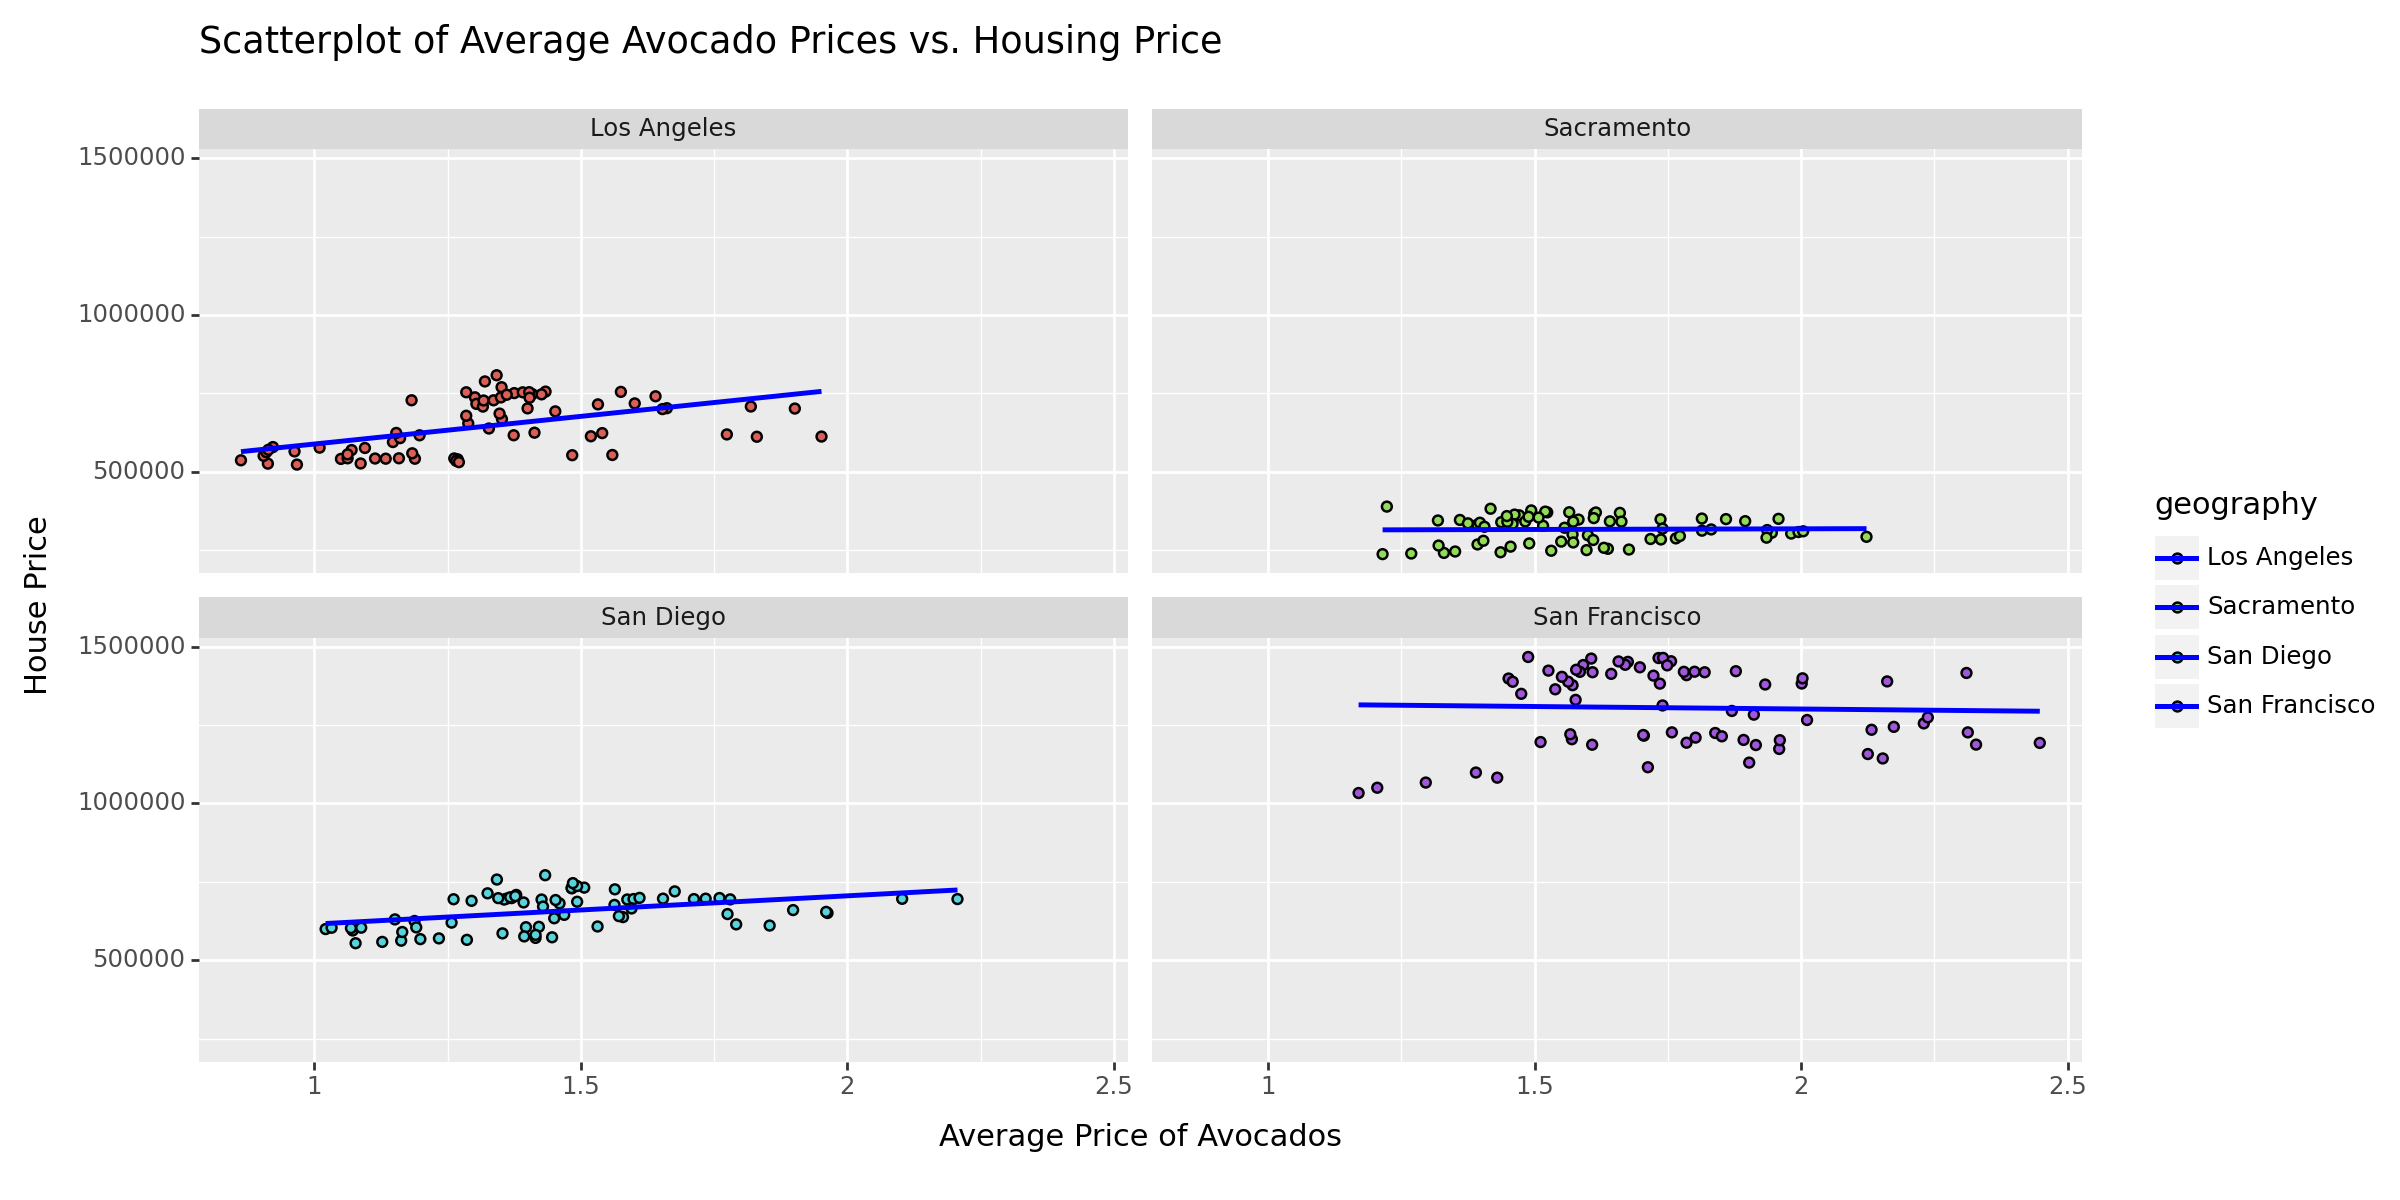

<Figure Size: (1200 x 600)>

In [367]:
(p9.ggplot(plot_data,
p9.aes(
    x='average_price',
    y='house_price',
    fill = 'geography'
))
    + p9.geom_point()
    + p9.labs(title='Scatterplot of Average Avocado Prices vs. Housing Price',
           x='Average Price of Avocados',
           y='House Price')
    + p9.facet_wrap('geography')
    + p9.geom_smooth(method='lm', color='blue', se=False)
)

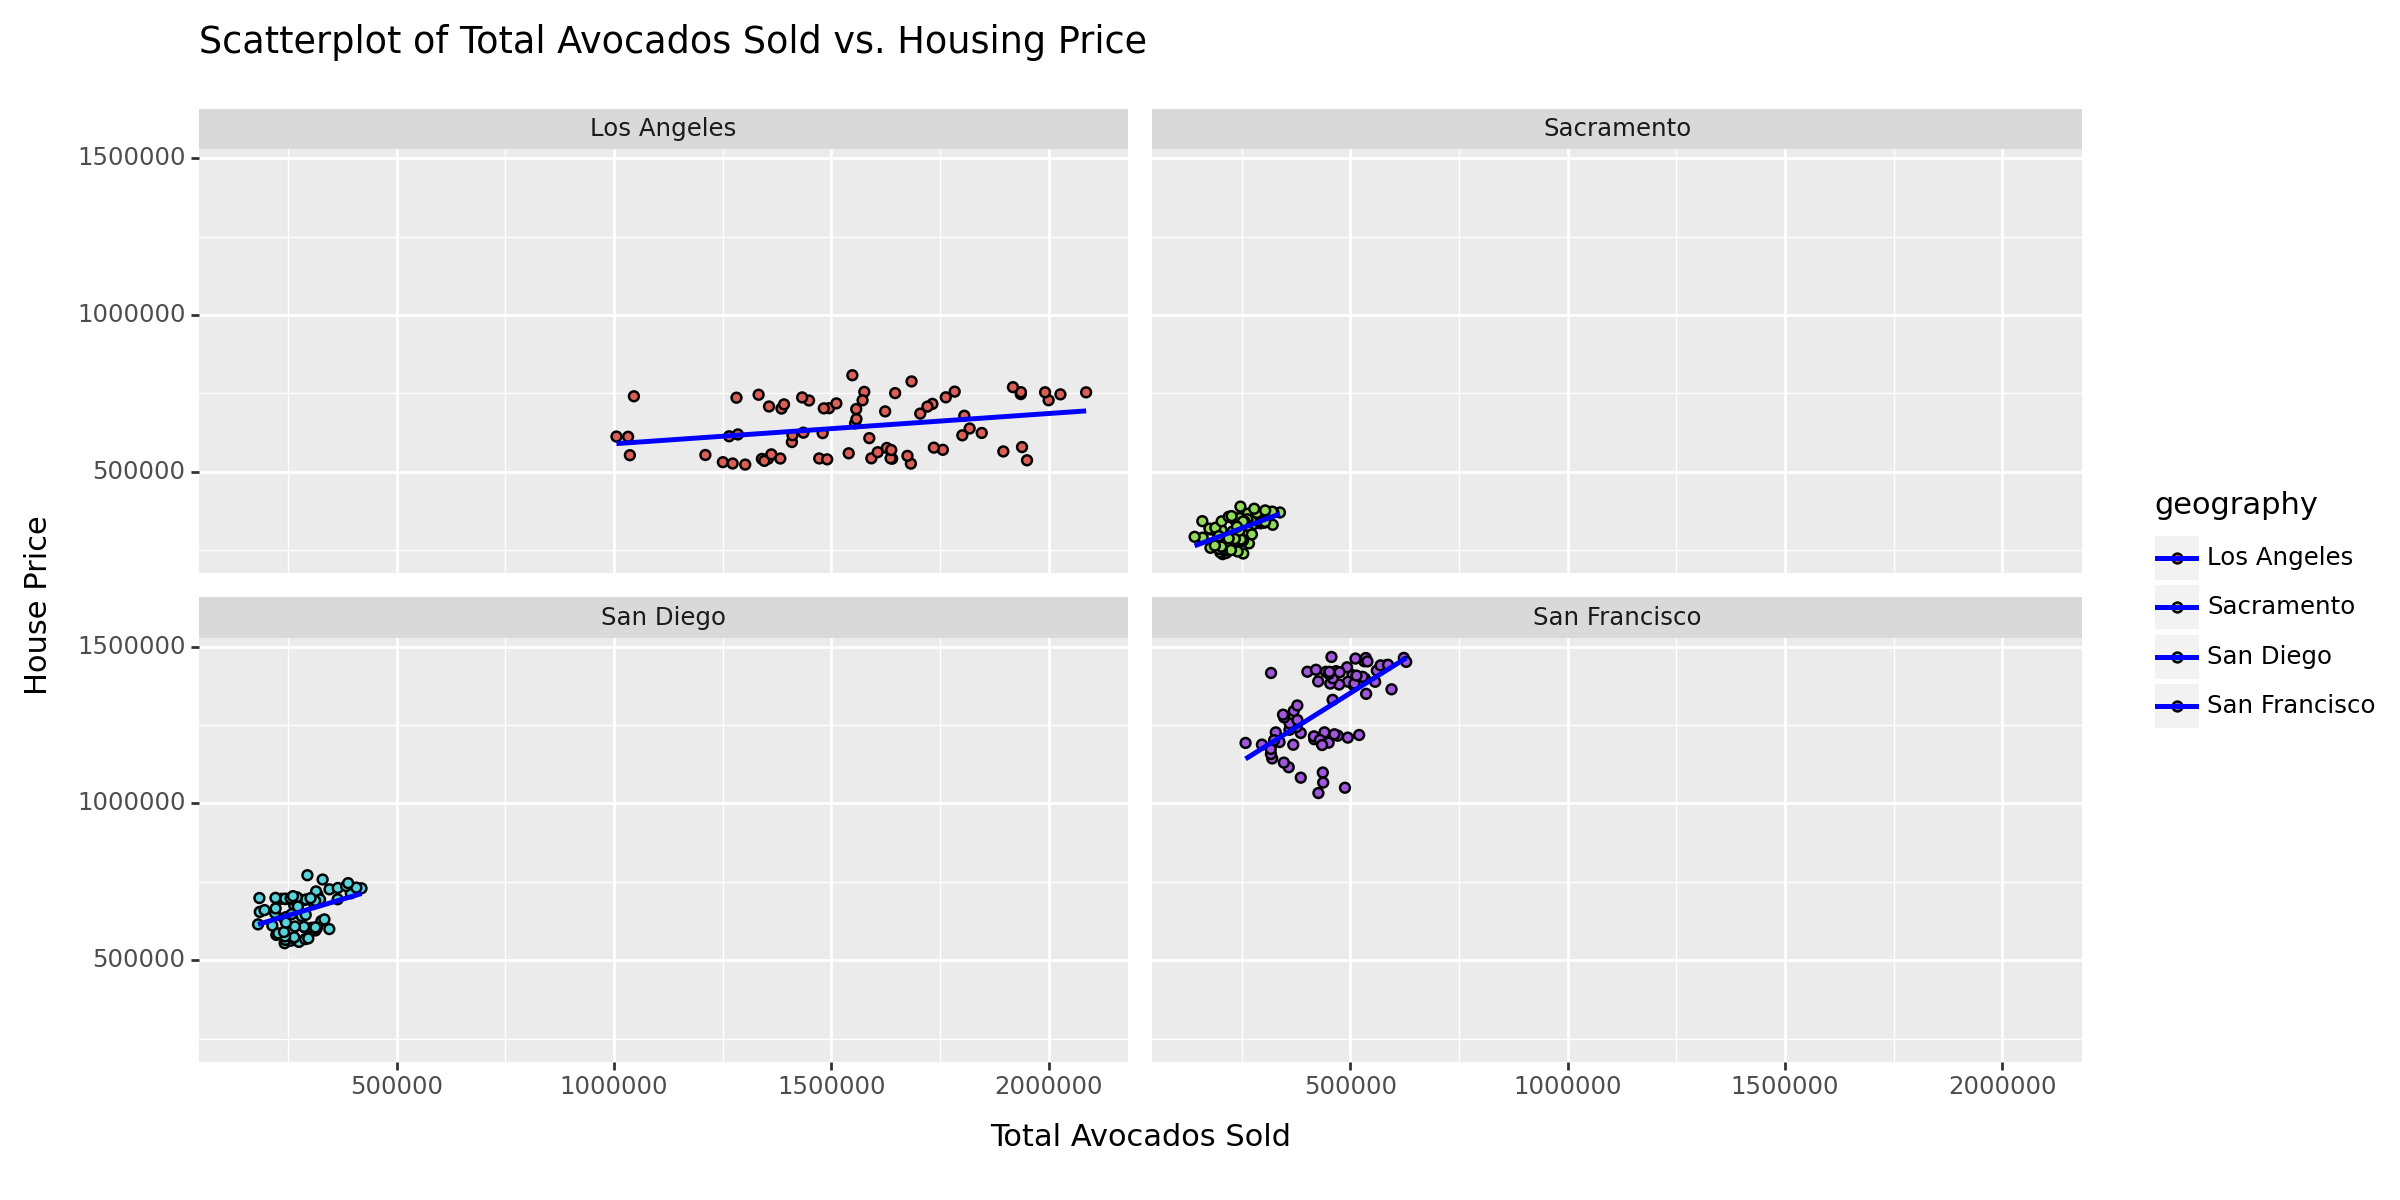

<Figure Size: (1200 x 600)>

In [368]:
(p9.ggplot(plot_data,
p9.aes(
    x='total_volume',
    y='house_price',
    fill = 'geography'
))
    + p9.geom_point()
    + p9.labs(title='Scatterplot of Total Avocados Sold vs. Housing Price',
           x='Total Avocados Sold',
           y='House Price')
    + p9.facet_wrap('geography')
    + p9.geom_smooth(method='lm', color='blue', se=False)
)

In [331]:
plot_data.describe()

,year,month,average_price,total_volume,house_price
count,306.000000,306.000000,306.000000,3.060000e+02,3.060000e+02
mean,2017.611111,6.428105,1.532658,6.114003e+05,6.848680e+05
std,1.722296,3.404394,0.292495,5.457501e+05,3.908624e+05
min,2015.000000,1.000000,0.862500,1.417680e+05,9.326643e+04
25%,2016.000000,3.250000,1.351063,2.615234e+05,3.500482e+05
50%,2018.000000,6.000000,1.493000,3.317468e+05,6.242201e+05
75%,2019.000000,9.000000,1.721625,5.674302e+05,7.554377e+05
max,2020.000000,12.000000,2.447500,2.086343e+06,1.467093e+06


After merging together data on housing prices in the cities of San Diego, San Francisco, Sacramento and Los Angeles, the data somewhat supports the idea that avocado prices and total volume sold are positively related to housing prices. The scatterplots of both the average prices of avocados and total volume of avocados sold vs. housing prices indicate a somewhat positive correlation across all 4 California cities. Due to this, the line of best fit is a slightly positive slope, showing a small trend or relationship between both avocado prices and total volume and housing prices. In other words, as the average prices of avocados or total volume of avocados increases, the price of a single-family home slightly increases. If there were a stronger positive relationship between avocado prices or total avocado sales and housing prices, you would expect to see a steep positive slope. Since this is not the case, we can conclude that there is only a small positive relationship between the two variables, although further testing would need to be done to make sure such as significance tests and checking if there is a non-linear relationship between the variables.

Citations:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
https://loveonetoday.com/how-to/identify-hass-avocados/
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html
http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually#change-colors-by-groups
https://www.zillow.com/research/data/

Assisted by ChatGPT
- Order of Data Cleaning
- .isin() help
- Aggregation
- unstacking
- line of best fit for scatterplots